In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/netflix_titles.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.size

105684

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
new_df = df

In [ ]:
new_df.shape

(8807, 12)

In [ ]:
new_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [ ]:
new_df.drop_duplicates(inplace = True)

In [ ]:
new_df.shape

(5398, 12)

In [ ]:
new_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
null_removed = new_df.dropna(subset=['director','cast','country','title','date_added','release_year','rating','duration','listed_in','description'])

In [ ]:
null_removed.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<Axes: >

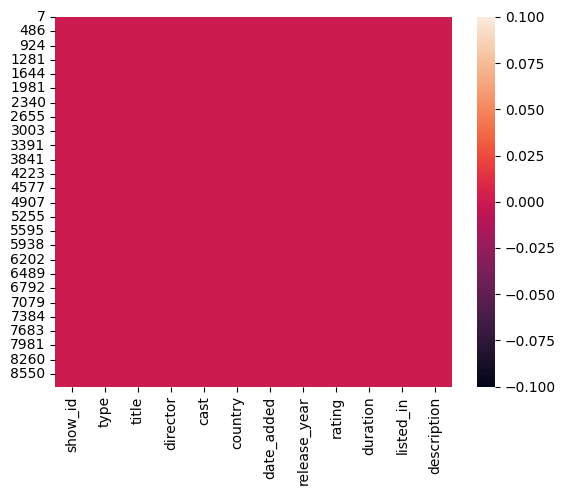

In [ ]:
sns.heatmap(null_removed.isna())

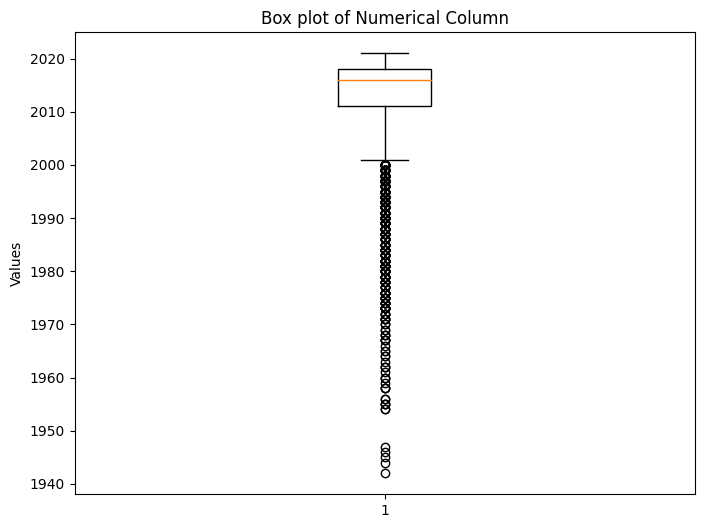

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(null_removed['release_year'])
plt.title('Box plot of Numerical Column')
plt.ylabel('Values')
plt.show()

In [ ]:
z_scores = np.abs((null_removed['release_year'] - null_removed['release_year'].mean()) / null_removed['release_year'].std())

In [ ]:
z_scores

7       2.050953
8       0.857887
9       0.857887
12      0.857887
24      1.531517
          ...   
8801    0.234564
8802    0.596533
8804    0.388758
8805    0.700420
8806    0.234564
Name: release_year, Length: 5332, dtype: float64

In [ ]:
threshold = 3


In [ ]:
outliers_removed_df = null_removed[z_scores <= threshold]

In [ ]:
print("Original DataFrame shape:", df.shape)


Original DataFrame shape: (8807, 12)


In [ ]:
print("Outlier-removed DataFrame shape:", outliers_removed_df.shape)

Outlier-removed DataFrame shape: (5186, 12)


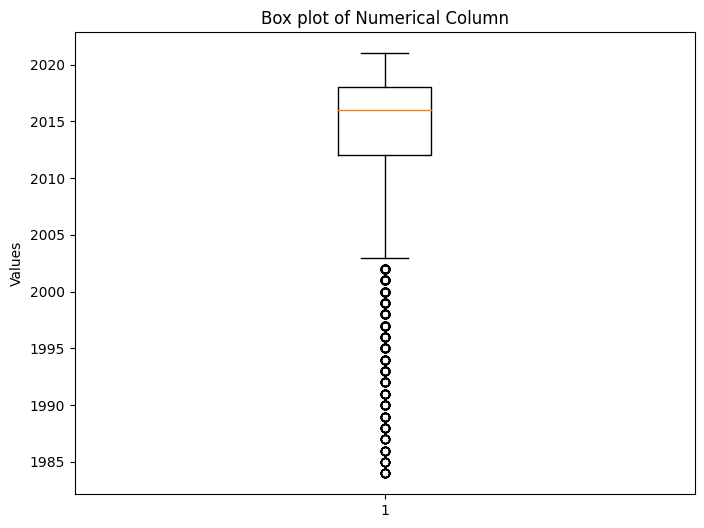

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(outliers_removed_df['release_year'])
plt.title('Box plot of Numerical Column')
plt.ylabel('Values')
plt.show()

In [ ]:
clean_data = outliers_removed_df

In [ ]:
clean_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
clean_data.duplicated().sum()

0

In [ ]:
clean_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
clean_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
# Assuming 'df' is your DataFrame after performing EDA

# Specify the file path where you want to save the CSV file
file_path = "eda_results.csv"

# Save the DataFrame to a CSV file
clean_data.to_csv(file_path, index=False)

print("DataFrame after EDA saved to:", file_path)


DataFrame after EDA saved to: eda_results.csv


**## Using cleand csv for categorical columns**

In [ ]:
new_csv = pd.read_csv("/content/preprocessing_results.csv")

## **Doing encoding for categorical columns**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
one_hot_encoded_df = pd.get_dummies(new_csv, columns=['type', 'rating'])


In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False)


In [ ]:
one_hot_encoded_data = one_hot_encoder.fit_transform(new_csv[['type', 'rating']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
one_hot_encoded_df_sklearn = pd.DataFrame(one_hot_encoded_data, columns=one_hot_encoder.get_feature_names_out(['type', 'rating']))

In [ ]:
print("\nOne-Hot Encoded DataFrame (Scikit-learn):\n", one_hot_encoded_df_sklearn)



One-Hot Encoded DataFrame (Scikit-learn):
       type_Movie  type_TV Show  rating_G  rating_NC-17  rating_NR  rating_PG  \
0            1.0           0.0       0.0           0.0        0.0        0.0   
1            0.0           1.0       0.0           0.0        0.0        0.0   
2            1.0           0.0       0.0           0.0        0.0        0.0   
3            1.0           0.0       0.0           0.0        0.0        0.0   
4            1.0           0.0       0.0           0.0        0.0        0.0   
...          ...           ...       ...           ...        ...        ...   
5181         1.0           0.0       0.0           0.0        0.0        0.0   
5182         1.0           0.0       0.0           0.0        0.0        0.0   
5183         1.0           0.0       0.0           0.0        0.0        0.0   
5184         1.0           0.0       0.0           0.0        0.0        1.0   
5185         1.0           0.0       0.0           0.0        0.0        0.0

In [ ]:
one_hot_encoded_df_sklearn

,type_Movie,type_TV Show,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5181,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5182,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5183,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5184,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['type_Movie'].plot(kind='hist', bins=20, title='type_Movie')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['type_TV Show'].plot(kind='hist', bins=20, title='type_TV Show')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['rating_G'].plot(kind='hist', bins=20, title='rating_G')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='type_Movie', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='type_Movie', y='type_TV Show', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='type_TV Show', y='rating_G', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='rating_G', y='rating_NC-17', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['type_Movie']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('type_Movie')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['type_TV Show']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('type_TV Show')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['rating_G']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('rating_G')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['rating_NC-17']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('rating_NC-17')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['type_Movie'].plot(kind='line', figsize=(8, 4), title='type_Movie')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['type_TV Show'].plot(kind='line', figsize=(8, 4), title='type_TV Show')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['rating_G'].plot(kind='line', figsize=(8, 4), title='rating_G')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
concatenated_df = pd.concat([new_csv, one_hot_encoded_df_sklearn], axis=1)

In [ ]:
print("Concatenated DataFrame:\n", concatenated_df)


Concatenated DataFrame:
      show_id     type                          title             director  \
0         s8    Movie                        Sankofa         Haile Gerima   
1         s9  TV Show  The Great British Baking Show      Andy Devonshire   
2        s10    Movie                   The Starling       Theodore Melfi   
3        s13    Movie                   Je Suis Karl  Christian Schwochow   
4        s25    Movie                          Jeans           S. Shankar   
...      ...      ...                            ...                  ...   
5181   s8802    Movie                        Zinzana      Majid Al Ansari   
5182   s8803    Movie                         Zodiac        David Fincher   
5183   s8805    Movie                     Zombieland      Ruben Fleischer   
5184   s8806    Movie                           Zoom         Peter Hewitt   
5185   s8807    Movie                         Zubaan          Mozez Singh   

                                                  

In [ ]:
file_path = "onehot_results.csv"

# Save the DataFrame to a CSV file
concatenated_df.to_csv(file_path, index=False)

print("DataFrame after onehot_results saved to:", file_path)

DataFrame after onehot_results saved to: onehot_results.csv


In [ ]:
ml_algo = pd.read_csv("/content/onehot_results.csv")

In [ ]:
ml_algo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5186 entries, 0 to 5185
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   show_id            5186 non-null   object 
 1   type               5186 non-null   object 
 2   title              5186 non-null   object 
 3   director           5186 non-null   object 
 4   cast               5186 non-null   object 
 5   country            5186 non-null   object 
 6   date_added         5186 non-null   object 
 7   release_year       5186 non-null   int64  
 8   rating             5186 non-null   object 
 9   duration           5186 non-null   object 
 10  listed_in          5186 non-null   object 
 11  description        5186 non-null   object 
 12  type_Movie         5186 non-null   float64
 13  type_TV Show       5186 non-null   float64
 14  rating_G           5186 non-null   float64
 15  rating_NC-17       5186 non-null   float64
 16  rating_NR          5186 

In [ ]:
one_hot_encoded_df_sklearn.columns

Index(['type_Movie', 'type_TV Show', 'rating_G', 'rating_NC-17', 'rating_NR',
       'rating_PG', 'rating_PG-13', 'rating_R', 'rating_TV-14', 'rating_TV-G',
       'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y', 'rating_TV-Y7',
       'rating_TV-Y7-FV', 'rating_UR'],
      dtype='object')

In [ ]:
# Assuming 'concatenated_df' is your DataFrame with both features and target variable
# 'target_variable' is the name of your target variable column

# Define X (features) and y (target variable)
X = one_hot_encoded_df_sklearn.drop(columns=['type_Movie',])  # Assuming you drop the target variable column
y = one_hot_encoded_df_sklearn['type_TV Show']

# Now you can proceed with the logistic regression code

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'X' contains your features and 'y' contains your target variable (binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1013
         1.0       1.00      1.00      1.00        25

    accuracy                           1.00      1038
   macro avg       1.00      1.00      1.00      1038
weighted avg       1.00      1.00      1.00      1038


Confusion Matrix:
[[1013    0]
 [   0   25]]
